# **Student Performance Analyzer**

**🟢 Step 1: Import Libraries**

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


**🟢 Step 2: Load Dataset**

In [42]:
df = pd.read_csv("/content/sample_data/student-mat.csv")
df.head()


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


🟢 Step 3: Select & Rename Useful Columns

In [43]:
df = df[['sex', 'studytime', 'absences', 'G3']]

df = df.rename(columns={
    'sex': 'Gender',
    'studytime': 'StudyHours',
    'absences': 'Absences',
    'G3': 'Marks'
})
df.head()


,Gender,StudyHours,Absences,Marks
0,F,2,6,6
1,F,2,4,6
2,F,2,10,10
3,F,3,2,15
4,F,2,4,10


In [44]:
# 🟢 Step 4: Clean & Transform Data

# Convert Gender: M = 0, F = 1
df['Gender'] = df['Gender'].map({'M': 0, 'F': 1})

# Drop any missing values
df.dropna(inplace=True)

# Create Attendance % (100 - Absences)
df['Attendance'] = 100 - df['Absences']
df.drop('Absences', axis=1, inplace=True)

# Add Result: Pass = 1 (Marks >= 10), Fail = 0
df['Result'] = df['Marks'].apply(lambda x: 1 if x >= 10 else 0)

df.head()


,Gender,StudyHours,Marks,Attendance,Result
0,1,2,6,94,0
1,1,2,6,96,0
2,1,2,10,90,1
3,1,3,15,98,1
4,1,2,10,96,1


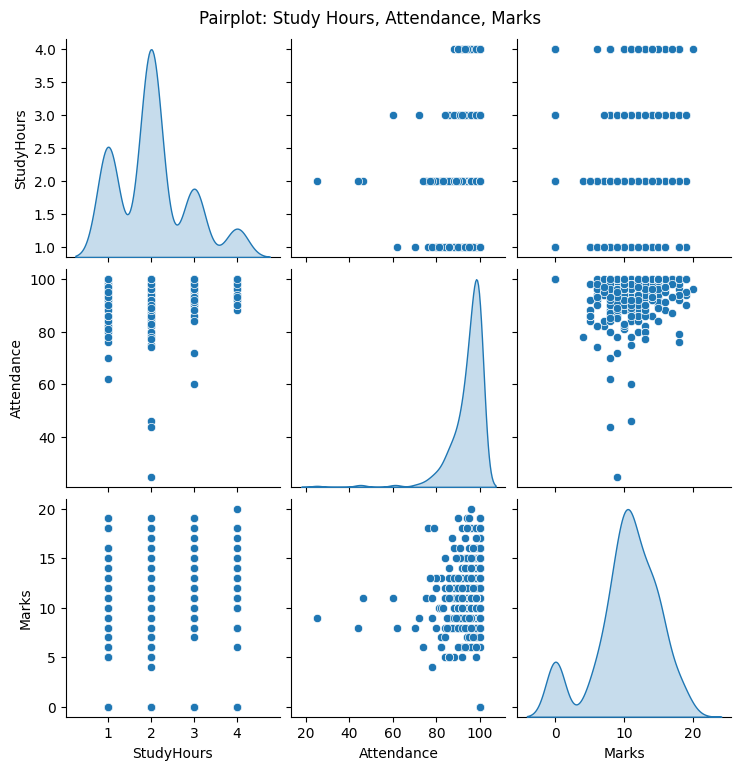

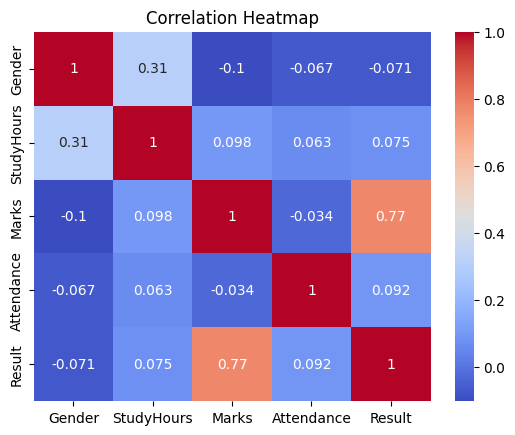

In [45]:
# 🟢 Step 5: Visualization

sns.pairplot(df[['StudyHours', 'Attendance', 'Marks']], diag_kind='kde')
plt.suptitle("Pairplot: Study Hours, Attendance, Marks", y=1.02)
plt.show()

sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


**🟢 Step 6: Logistic Regression Model**

**🔹 Step 6.1: Import Required ML Libraries**

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix


**🔹 Step 6.2: Define Features and Target**

In [51]:
# Features (input variables)
X = df[['StudyHours', 'Attendance']]

# Target (output variable)
y = df['Result']


**🔹 Step 6.3: Split the Data**


In [52]:
# 80% for training, 20% for testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


**🔹 Step 6.4: Train the Model**

In [53]:
# Create the model
model = LogisticRegression()

# Fit model on training data
model.fit(X_train, y_train)


LogisticRegression()

**🔹 Step 6.5: Predict on Test Data**

In [54]:
# Use the trained model to predict on test set
y_pred = model.predict(X_test)


**🔹 Step 6.6: Evaluate the Model**

In [55]:
# Accuracy score (how many correct out of total)
acc = accuracy_score(y_test, y_pred)

# Confusion Matrix: shows TP, TN, FP, FN
cm = confusion_matrix(y_test, y_pred)

print("✅ Model Accuracy:", acc)
print("📊 Confusion Matrix:\n", cm)


✅ Model Accuracy: 0.6582278481012658
📊 Confusion Matrix:
 [[ 0 27]
 [ 0 52]]


In [56]:
print(df.info())
print(df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Gender      395 non-null    int64
 1   StudyHours  395 non-null    int64
 2   Marks       395 non-null    int64
 3   Attendance  395 non-null    int64
 4   Result      395 non-null    int64
dtypes: int64(5)
memory usage: 15.6 KB
None
   Gender  StudyHours  Marks  Attendance  Result
0       1           2      6          94       0
1       1           2      6          96       0
2       1           2     10          90       1
3       1           3     15          98       1
4       1           2     10          96       1
